Optimal K: 4


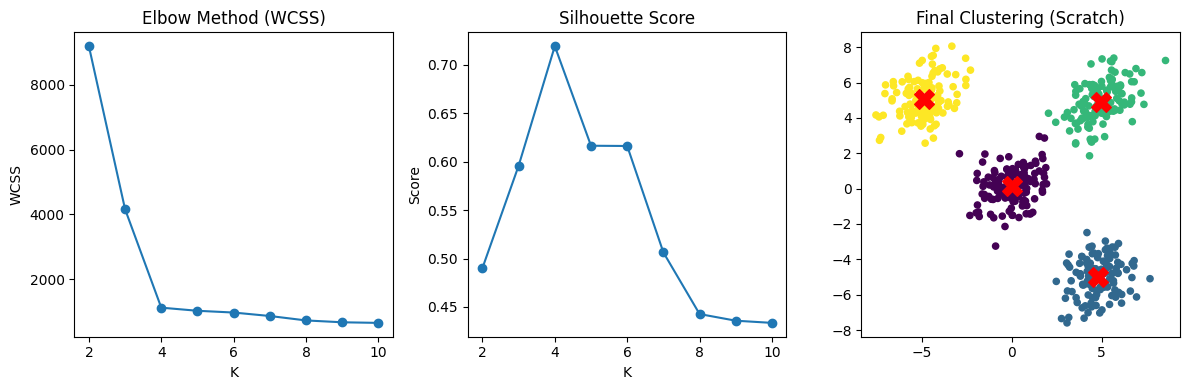


--- Comparison ---
Scratch WCSS: 1123.78
Sklearn WCSS: 1123.78
Scratch Silhouette: 0.719
Sklearn Silhouette: 0.719


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(42)

# ---------- DATA GENERATION (500 points, 4 overlapping clusters) ----------
X = np.vstack([
    np.random.multivariate_normal([0, 0], [[1.2, 0.4],[0.4, 1.2]], 125),
    np.random.multivariate_normal([5, 5], [[1.2, 0.4],[0.4, 1.2]], 125),
    np.random.multivariate_normal([-5, 5], [[1.2, 0.4],[0.4, 1.2]], 125),
    np.random.multivariate_normal([5, -5], [[1.2, 0.4],[0.4, 1.2]], 125)
])

# ---------- K-MEANS FROM SCRATCH ----------
def kmeans_scratch(X, k, max_iters=100):
    centroids = X[np.random.choice(len(X), k, replace=False)]
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, None] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    wcss = sum(np.sum((X[labels == i] - centroids[i])**2) for i in range(k))
    return labels, centroids, wcss

# ---------- ELBOW & SILHOUETTE ----------
K_range = range(2, 11)
wcss_vals, sil_vals = [], []

for k in K_range:
    labels, centroids, wcss = kmeans_scratch(X, k)
    wcss_vals.append(wcss)
    sil_vals.append(silhouette_score(X, labels))

optimal_k = K_range[np.argmax(sil_vals)]
print("Optimal K:", optimal_k)

# ---------- FINAL SCRATCH K-MEANS ----------
final_labels, final_centroids, final_wcss = kmeans_scratch(X, optimal_k)

# ---------- VISUALIZATION ----------
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.plot(K_range, wcss_vals, marker='o')
plt.title("Elbow Method (WCSS)")
plt.xlabel("K"); plt.ylabel("WCSS")

plt.subplot(1,3,2)
plt.plot(K_range, sil_vals, marker='o')
plt.title("Silhouette Score")
plt.xlabel("K"); plt.ylabel("Score")

plt.subplot(1,3,3)
plt.scatter(X[:,0], X[:,1], c=final_labels, cmap='viridis', s=20)
plt.scatter(final_centroids[:,0], final_centroids[:,1], c='red', s=200, marker='X')
plt.title("Final Clustering (Scratch)")

plt.tight_layout()
plt.show()

# ---------- SKLEARN COMPARISON ----------
sk = KMeans(n_clusters=optimal_k, random_state=42)
sk_labels = sk.fit_predict(X)

print("\n--- Comparison ---")
print("Scratch WCSS:", round(final_wcss,2))
print("Sklearn WCSS:", round(sk.inertia_,2))
print("Scratch Silhouette:", round(silhouette_score(X, final_labels),3))
print("Sklearn Silhouette:", round(silhouette_score(X, sk_labels),3))
